<a href="https://colab.research.google.com/github/Sushantstha2025/AI_worksheet/blob/main/workshop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()

    text = re.sub('[^a-zA-Z]', ' ', text)

    words = word_tokenize(text)

    words = [stemmer.stem(word) for word in words if word not in stop_words]

    return " ".join(words)


In [ ]:
df['clean_review'] = df['review'].apply(preprocess)
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

In [ ]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
vectorizer = CountVectorizer(max_features=5000)

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_bow)
y_prob = model.predict_proba(X_test_bow)[:,1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8494


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Precision: 0.8550753768844221
Recall: 0.8442151220480254
F1-score: 0.8496105452366687


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4240  721]
 [ 785 4254]]


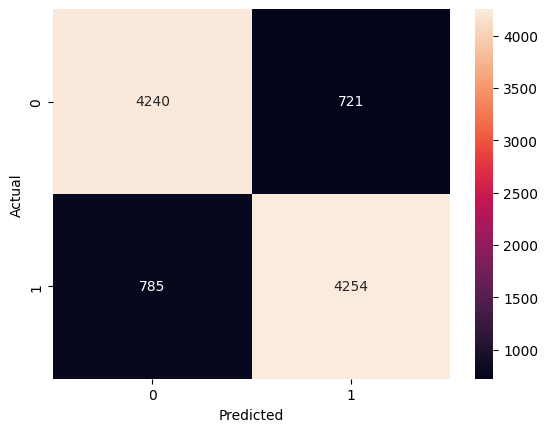

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc)

ROC-AUC Score: 0.9124241518854007


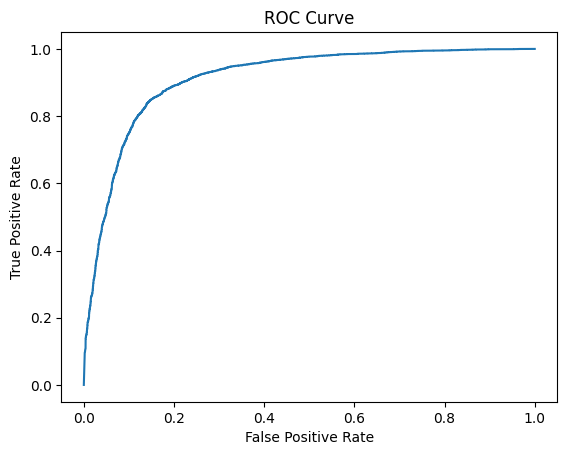

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
# task 2

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/datasets/breast-cancer-wisconsin.data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,0,1002945,5,4,4,5,7,10,3,2,1,2
1,1,1015425,3,1,1,1,2,2,3,1,1,2
2,2,1016277,6,8,8,1,3,4,3,7,1,2
3,3,1017023,4,1,1,3,2,1,3,1,1,2
4,4,1017122,8,10,10,8,7,10,9,7,1,4


In [41]:
df.describe()

,index,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,698.00000,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,348.50000,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,201.63953,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,0.00000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,174.25000,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,348.50000,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,522.75000,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,697.00000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [47]:
df.isnull().sum()
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.apply(pd.to_numeric, errors='coerce')

/tmp/ipython-input-3373946470.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [48]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [57]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = y.map({2:0, 4:1})

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [59]:
model = LogisticRegression(max_iter=5000)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=5)

In [60]:
selected_features = X.columns[rfe.support_]
print("Top 5 features:")
print(selected_features)

Top 5 features:
Index(['5', '1.1', '1.3', '3', '1.5'], dtype='object')


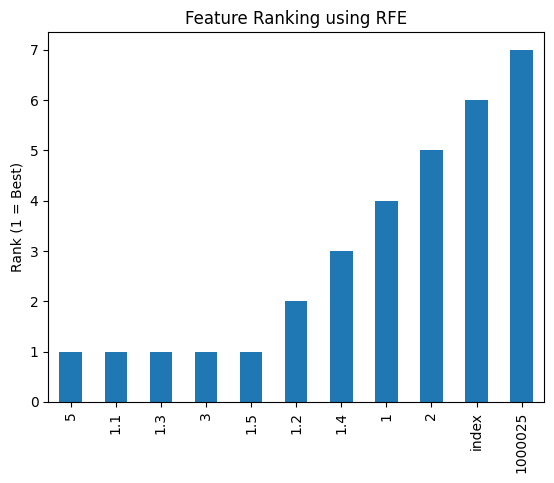

In [61]:
ranking = pd.Series(rfe.ranking_, index=X.columns)

ranking.sort_values().plot(kind='bar')
plt.ylabel("Rank (1 = Best)")
plt.title("Feature Ranking using RFE")
plt.show()

In [62]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model_sel = LogisticRegression(max_iter=5000)
model_sel.fit(X_train_sel, y_train)

LogisticRegression(max_iter=5000)

In [63]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [64]:
model_all = LogisticRegression(max_iter=5000)
model_all.fit(X_train, y_train)

print("Performance with ALL features")
evaluate(model_all, X_test, y_test)

Performance with ALL features
Accuracy: 0.9785714285714285
Precision: 0.9444444444444444
Recall: 1.0
F1: 0.9714285714285714
ROC-AUC: 0.9925093632958801

Confusion Matrix:
[[86  3]
 [ 0 51]]


In [65]:
print("\nPerformance with SELECTED features")
evaluate(model_sel, X_test_sel, y_test)


Performance with SELECTED features
Accuracy: 0.9642857142857143
Precision: 0.9423076923076923
Recall: 0.9607843137254902
F1: 0.9514563106796117
ROC-AUC: 0.9944921788940295

Confusion Matrix:
[[86  3]
 [ 2 49]]


In [66]:
for k in [3, 7]:
    print(f"\n===== Top {k} Features =====")

    rfe = RFE(LogisticRegression(max_iter=5000), n_features_to_select=k)
    rfe.fit(X_train, y_train)

    features = X.columns[rfe.support_]

    X_train_k = X_train[features]
    X_test_k = X_test[features]

    model_k = LogisticRegression(max_iter=5000)
    model_k.fit(X_train_k, y_train)

    evaluate(model_k, X_test_k, y_test)


===== Top 3 Features =====
Accuracy: 0.95
Precision: 0.94
Recall: 0.9215686274509803
F1: 0.9306930693069307
ROC-AUC: 0.9856796651244768

Confusion Matrix:
[[86  3]
 [ 4 47]]

===== Top 7 Features =====
Accuracy: 0.9714285714285714
Precision: 0.9433962264150944
Recall: 0.9803921568627451
F1: 0.9615384615384616
ROC-AUC: 0.9942718660497907

Confusion Matrix:
[[86  3]
 [ 1 50]]
